# Project 1.1: Understanding linear models on synthetic data

```
From ML Theory to Practice
Universität Potsdam, fall semester 2025

Authors: Juan L. Gamella and Simon Bing
License: CC-BY-4.0 https://creativecommons.org/licenses/by/4.0/
```

## Imports

These packages should already be installed in your Python virtual environment.

In [59]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [60]:
coef_to_pred_mapping = {
    'X0': 'β0',
    'X1': 'β1',
    'X2': 'β2',
    'X3': 'β3'
}

## Generating synthetic data

<mark style="background-color: #db40e0ff;"> Task </mark> 

Write code to generate `N` samples from the following linear model

$Y := \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$

where $\beta \in \mathbb{R}^4$ and $\epsilon \sim \mathcal{N}(0,1)$, and $X_1$, $X_2$, $X_3$ are sampled independently and uniformly at random from $[0,10]$.

For now, set $\beta = (0,1,2,3)$, `N = 100` and store the samples in a dataframe with columns `X0, X1, X2, X3, Y`, where `X0` is just a vector of ones.

In [ ]:
# ---------------------------
# 1) Data generation
# ---------------------------

# list containing true Beta parameters
true_coefficients = np.array([0,1,2,3])
def generate_dataset(N, seed, model_coefficients = true_coefficients):
    """
    Generates a DataFrame with N samples based on a linear model.

    Args:
        N (int): The number of samples to generate.
        seed (int): A seed for the random number generator for reproducibility.
        model_coefficients (np.ndarray): An array of the true model coefficients Beta.

    Returns:
        pd.DataFrame: A DataFrame containing the generated data.
    """
    rng = np.random.default_rng(seed)

    # create N random samples for each predictor and the error term
    X0 = np.ones(N)                            # Intercept
    X1 = rng.uniform(low=0, high=10, size=N)
    X2 = rng.uniform(low=0, high=10, size=N)
    X3 = rng.uniform(low=0, high=10, size=N)
    noise = rng.standard_normal(size=N)

    # Calculate observed data points with the linear model
    β0, β1, β2, β3 = model_coefficients
    Y = β0 * X0 + β1 * X1 + β2 * X2 + β3 * X3 + noise
    
    # return dataframe    
    return pd.DataFrame({'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

In [62]:
# generate dataset
data = generate_dataset(N=100, seed=42)

In [63]:
print("First 5 rows of the generated data:")
data.head()

First 5 rows of the generated data:


,X0,X1,X2,X3,Y
0,1.0,7.739560,9.085807,7.774048,48.941148
1,1.0,4.388784,6.997071,9.718264,47.434232
2,1.0,8.585979,2.658700,5.007412,28.673637
3,1.0,6.973680,9.691764,1.438975,30.826695
4,1.0,0.941773,7.787509,0.139363,18.406372


## Visualize the data

<mark style="background-color: #40E0D0;"> Task </mark> 

Before fitting a model, lets do a sanity check on the data. Make a corner plot using [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html), and specify `vars=['X1', 'X2', 'X3', 'Y']` and `corner=True`. Look at the row for `Y` vs. the other variables and check that there is indeed the linear effect you expect.

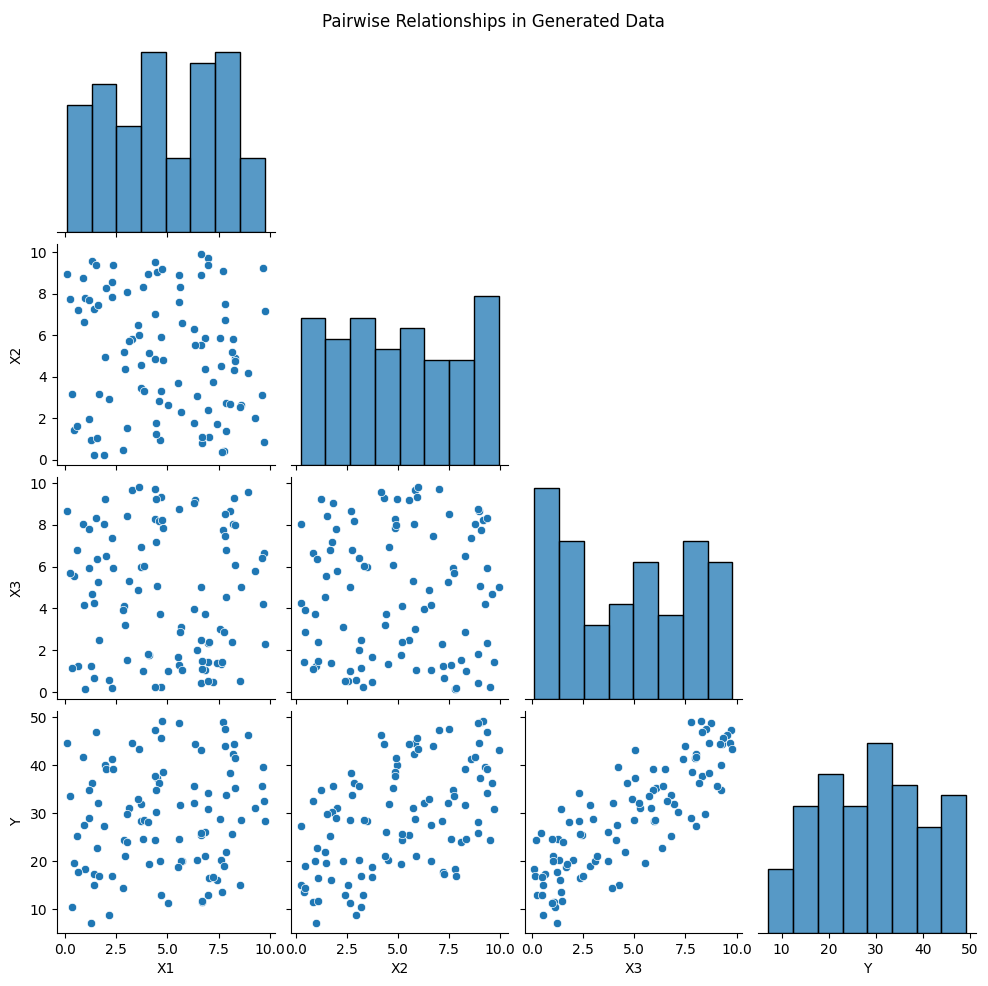

In [ ]:
# plot to confirm linear relationships between predictors and Y values
sns.pairplot(data, vars=['X1', 'X2', 'X3', 'Y'], corner=True)

plt.suptitle('Pairwise Relationships in Generated Data')
plt.show()

<mark style="background-color: #648fff;">Question:</mark> Write down anything that surprises you to discuss later with your classmates.

Observation:   
In the last row we see the linear relationship between Y and each predictor X. Each predictor shows a clear positive linear trend with the outcome Y. 
What stands out is that the linear relationship between ($Y,X_1$) is noticeably weaker than for ($Y,X_3$).  
Since $\beta_1 = 1, \beta_2 = 2$ and $\beta_3 = 3$, the magnitude of the slope (and hence the correlation strength) increases from $X_1$ to $X_3$.

## Fitting a linear model using `statsmodels`

Now, we will use statsmodels to fit a linear model using Ordinary Least Squares (OLS).

You can do this by calling:

```results = sm.OLS(<outcome>,<predictors>).fit()```

where `outcome` and `predictors` are dataframes. You can find an example [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) (feel free to ask your favorite chatbot for help).

<mark style="background-color: #40E0D0;"> Task </mark> 

Fit a linear model to predict `Y` from `X0, X1, X2, X3`. Store the fitted model in a variable called `results`.

In [65]:
# ---------------------------
# 2) Fit OLS and inspect
# ---------------------------

# Separate the outcome (Y) from predictors (X's)
outcome = data['Y']
predictors = data[['X0', 'X1', 'X2', 'X3']].rename(columns=coef_to_pred_mapping)

# Fit the Ordinary Least Squares (OLS) model to estimate parameters β 
# that minimize the prediction error, between the predicted and observed values
results = sm.OLS(outcome, predictors).fit()

## Interpreting the results

<mark style="background-color: #40E0D0;"> Task </mark> 


Print the summary table of the linear model calling `print(results.summary())`.

In [66]:
print("\nOLS summary (N=100):")
print(results.summary())


OLS summary (N=100):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3777.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.84e-99
Time:                        16:12:21   Log-Likelihood:                -142.63
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      96   BIC:                             303.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
β0             0.3439      0.3

According to the model summary, the estimated parameters $\hat{\beta_1},  \hat{\beta_2}$ and $\hat{\beta_3}$ are highly significant in explaining the outcome variable $Y$, as indicated by large t-values (≫ 2) and small p-values (< 0.05).
The estimated effect size increases from $\hat{\beta_1}$ to $\hat{\beta_3}$, which aligns with the true parameter values we specified at the beginning.  
  
Overall, the results confirm that the OLS estimator is unbiased and consistent, as the estimated coefficients accurately recover the true underlying parameters, with all true values lying within their respective 95 % confidence intervals.

<br>
<mark style="background-color: #648fff;">Question:</mark> What does the column `coef` show?

The coef column shows the estimated regression coefficients ($\hat{\beta}$'s), that the model has learned from the generated dataset.

<mark style="background-color: #648fff;">Question:</mark> Why is $\hat{\beta}_0$ not zero?

The estimated intercept $\hat{\beta}_0$ is not exactly zero because of random sampling variation and noise in the simulated data. Since its p-value is greater than 0.05, the deviation from zero is not statistically significant, meaning there is no evidence that the true intercept differs from zero.

These small deviations happen purely due to random error in the data generation process.

<mark style="background-color: #648fff;">Question:</mark> What do the columns `[0.025` and `0.975]` show?

The columns [0.025 and 0.975] represent the lower and upper limits of the 95 % confidence interval for each estimated coefficient.
They indicate the range of plausible values for the true parameters $\beta$ and thus quantify the uncertainty of the estimates. 
Since this is a two-sided 95 % confidence interval, 2.5 % of the probability mass lies in each tail of the corresponding sampling distribution - one on the left and one on the right. 

<mark style="background-color: #648fff;">Question:</mark> What does the columns `P>|t|` show? Why is the entry for `X0` larger than the others?

The P>|t| column shows the p-value for each coefficient’s t-test, so the probability of observing a t-value as extreme or more extreme than $∣t_j∣$ under the null-hypothesis.  
A small p-value (< 0.05) means the coefficient is statistically significant in explaining the data.
  
The value for $\beta_0$ is statistically not significant (p-value > 0.05), meaning the model has no evidence that the true intercept differs from 0. The small deviation observed for $\hat{\beta}_0$ arises purely from random noise in the generated data.

<mark style="background-color: #648fff;">Question:</mark> Change the random seed above, generate fresh data, and re-fit the model. What has happened to the values in `P>|t|`? Why?

All values changed.  

Each time we generate data without setting a fixed random seed (or setting different ones), new values are drawn from the underlying random distributions — so the specific samples, and consequently the estimated coefficients and p-values, change in each iteration.

By setting a seed, we ensure that the same random numbers are generated every time we run the code. This guarantees that the results are reproducible and comparable across iterations.



<mark style="background-color: #648fff;">Question:</mark> If you increase the sample size `N`, what will happen to the columns `coef`, `P>|t|`, `[0.025`, and `0.975]`?

When we collect more data, the estimates become more precise, more significant, and closer to the true values.
The uncertainty (reflected by the width of confidence intervals) shrinks as the sample size grows (effect can be seen in the formula for the observed t-value/standard error).

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, generate fresh data with `N=1000` and `N=10000` and check your hypothesis:

In [67]:
# ---------------------------
# 3) Effect of sample size
# ---------------------------

# generate additional datasets of different sample size (medium and large)
data_mediumSize = generate_dataset(N=1000, seed=42)
data_largeSize = generate_dataset(N=10000, seed=42)

In [68]:
outcome_mediumSize = data_mediumSize['Y']
predictors_mediumSize = data_mediumSize[['X0', 'X1', 'X2', 'X3']].rename(columns=coef_to_pred_mapping)

results_mediumSize = sm.OLS(outcome_mediumSize, predictors_mediumSize).fit()

print("\nOLS summary (N=1000):")
print(results_mediumSize.summary())


OLS summary (N=1000):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.848e+04
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:12:22   Log-Likelihood:                -1411.1
No. Observations:                1000   AIC:                             2830.
Df Residuals:                     996   BIC:                             2850.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
β0             0.0680      0.

In [69]:
outcome_largeSize = data_largeSize['Y']
predictors_largeSize = data_largeSize[['X0', 'X1', 'X2', 'X3']].rename(columns=coef_to_pred_mapping)

results_largeSize = sm.OLS(outcome_largeSize, predictors_largeSize).fit()

print("\nOLS summary (N=10000):")
print(results_largeSize.summary())


OLS summary (N=10000):
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.792e+05
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:12:22   Log-Likelihood:                -14282.
No. Observations:               10000   AIC:                         2.857e+04
Df Residuals:                    9996   BIC:                         2.860e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
β0            -0.0360      0

<br>
<mark style="background-color: #648fff;">Question:</mark> What happened when you increased the sample size? Was your hypothesis correct?

Yes, the results confirmed my hypothesis.
As the sample size increased, the coefficient estimates became more precise, the p-values decreased, and the confidence intervals narrowed, indicating less uncertainty in the parameter estimates.

## Understanding confidence intervals

We will now do a few experiments to test your understanding of confidence intervals.

You can access the $\alpha=0.05$ confidence interval computed by a model by calling `results.conf_int()`.

In [70]:
print("\n95% Confidence intervals for coefficients (N=100):")
results.conf_int()


95% Confidence intervals for coefficients (N=100):


,0,1
β0,-0.324810,1.012686
β1,0.864464,1.015957
β2,1.943834,2.085686
β3,2.924888,3.058829


Where the rows correspond to the coefficient for each predictor, and the columns give you the lower (0) and upper (1) bound. You can access using `.loc`:

In [71]:
# The lower bound on the CI for the coefficient
results.conf_int().loc['β1', 0]

np.float64(0.8644640542170633)

To access the actual estimates for the coefficients, you can call `results.params`:

In [72]:
print("\nEstimated coefficients (N=100):")
results.params


Estimated coefficients (N=100):


β0    0.343938
β1    0.940210
β2    2.014760
β3    2.991859
dtype: float64

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, write code to
- generate a fresh dataset with a different random seed (but same N=100 and true_coefficients).
- fit a linear model on this dataset
- store the coefficient estimates and the confidence intervals for each model
  
Run this code 1000 times, storing the results in (for example) `all_coefs` and `all_cis`.

In [73]:
# ---------------------------
# 4) Sampling distribution over k experiments
# ---------------------------

k = 1000
all_coefs = []
all_cis = []

# run a total of k=1000 experiments
# for each experiment create dataset and save estimated coefficients and their 95%-CI's
for i in range(k):
    data = generate_dataset(N=100, seed=87 + i);      # varying seeds for randomization in the datasets
    Y = data['Y']
    X = data[['X0', 'X1', 'X2', 'X3']].rename(columns=coef_to_pred_mapping)

    results = sm.OLS(Y, X).fit()
    all_coefs.append(results.params)
    all_cis.append(results.conf_int())

all_coefs = np.array(all_coefs)
all_cis = np.array(all_cis)


##### Note: 
It is important to change the random seed in each iteration in order to generate different random datasets. This allows us to obtain a sampling distribution of the estimated coefficients.  
Keeping the same seed would produce identical datasets in every iteration — and therefore no distribution of coefficient estimates.

In [ ]:
# Combine the results from all 1000 runs into one DataFrame for analysis
coef_df = (
    pd.DataFrame(all_coefs, columns=coef_to_pred_mapping.keys())
      .rename(columns=coef_to_pred_mapping)
)

In [85]:
# Convert to data frame
# format: one row per coef per experiment
vars = ['β0', 'β1', 'β2', 'β3']

records = []
for i in range(all_cis.shape[0]):
    for j, var in enumerate(vars):
        low, high = all_cis[i, j, 0], all_cis[i, j, 1]
        records.append({
            'experiment': i,
            'coef': var,
            'low': low,
            'high': high
        })

cis_df = pd.DataFrame(records)

print("\nPreview of CI's:")
cis_df.head()


Preview of CI's:


,experiment,coef,low,high
0,0,β0,-0.601052,0.803586
1,0,β1,0.910157,1.055928
2,0,β2,2.014183,2.155744
3,0,β3,2.861329,3.010042
4,1,β0,-1.106479,0.198742


<mark style="background-color: #40E0D0;"> Task </mark> 

Now, for each variable `const, X1, X2, X3` plot the distribution of the fitted coefficients using [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

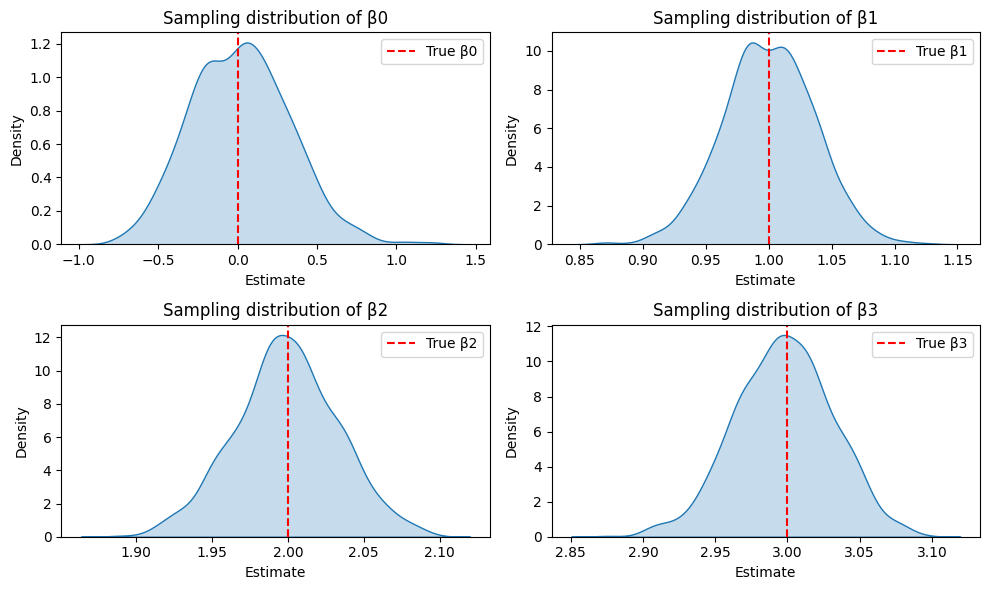

In [ ]:
# plots sampling distribution of each coefficient across experiments
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 2 cols
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]
    sns.kdeplot(coef_df[var], fill=True, ax=ax)
    
    # adds horizontal line for true value of coefficients
    true_val = true_coefficients[int(var[-1])] if var != 'X0' else true_coefficients[0]
    ax.axvline(true_val, color='red', linestyle='--', label=f"True {var}")
    
    ax.set_title(f"Sampling distribution of {var}")
    ax.set_xlabel("Estimate")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

<br>
<mark style="background-color: #648fff;">Question:</mark> What kind of distributions are these?

Each plot represents the sampling distribution of an estimated coefficient $\hat{\beta}_j$ across repeated samples, representing the variability of the estimator.

By the Central Limit Theorem, this distribution approaches normality as the sample size increases, provided the underlying distribution has finite mean and variance.

<br>
<mark style="background-color: #648fff;">Question:</mark> Why does the distribution for the coefficient of $X_0$ have larger variance?

One reason could be because $\beta_0$ is the intercept term. The intercept is estimated from an absolute/overall level of the data, while the other coefficients correspond to the effect size of the slopes and thereby just capture relative changes. 

Also, if the predictors are not centered, the intercept becomes the model’s estimate of 𝑌 when all predictors 𝑋 = 0.  
But if 0 is far away from the actual data points, the model has to guess that value by extrapolating beyond the observed range.  
This makes the intercept much more sensitive to random noise in the data.

<br>
<mark style="background-color: #40E0D0;"> Task </mark> 

Now, make the following plot to visualize the confidence intervals resulting from the 1000 models.

For each variable $X_j \in $(`X0, ..., X3`):

- Using [`plt.hlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html) plot each $\alpha = 0.95$ interval as a horizontal line, extending from its lower to upper limits. The line should be drawn at height `y=i`, where `i` is the index of the model (out of the 1000 fitted above).
- Using [`plt.vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html), draw a vertical line (e.g., in red), at the value of the true coefficient $\beta_j$ for that variable.

In [77]:
cis_df

,experiment,coef,low,high
0,0,β0,-0.601052,0.803586
1,0,β1,0.910157,1.055928
2,0,β2,2.014183,2.155744
3,0,β3,2.861329,3.010042
4,1,β0,-1.106479,0.198742
...,...,...,...,...
3995,998,β3,2.901953,3.056712
3996,999,β0,-0.597516,0.657928
3997,999,β1,0.934994,1.076271
3998,999,β2,1.952409,2.090469


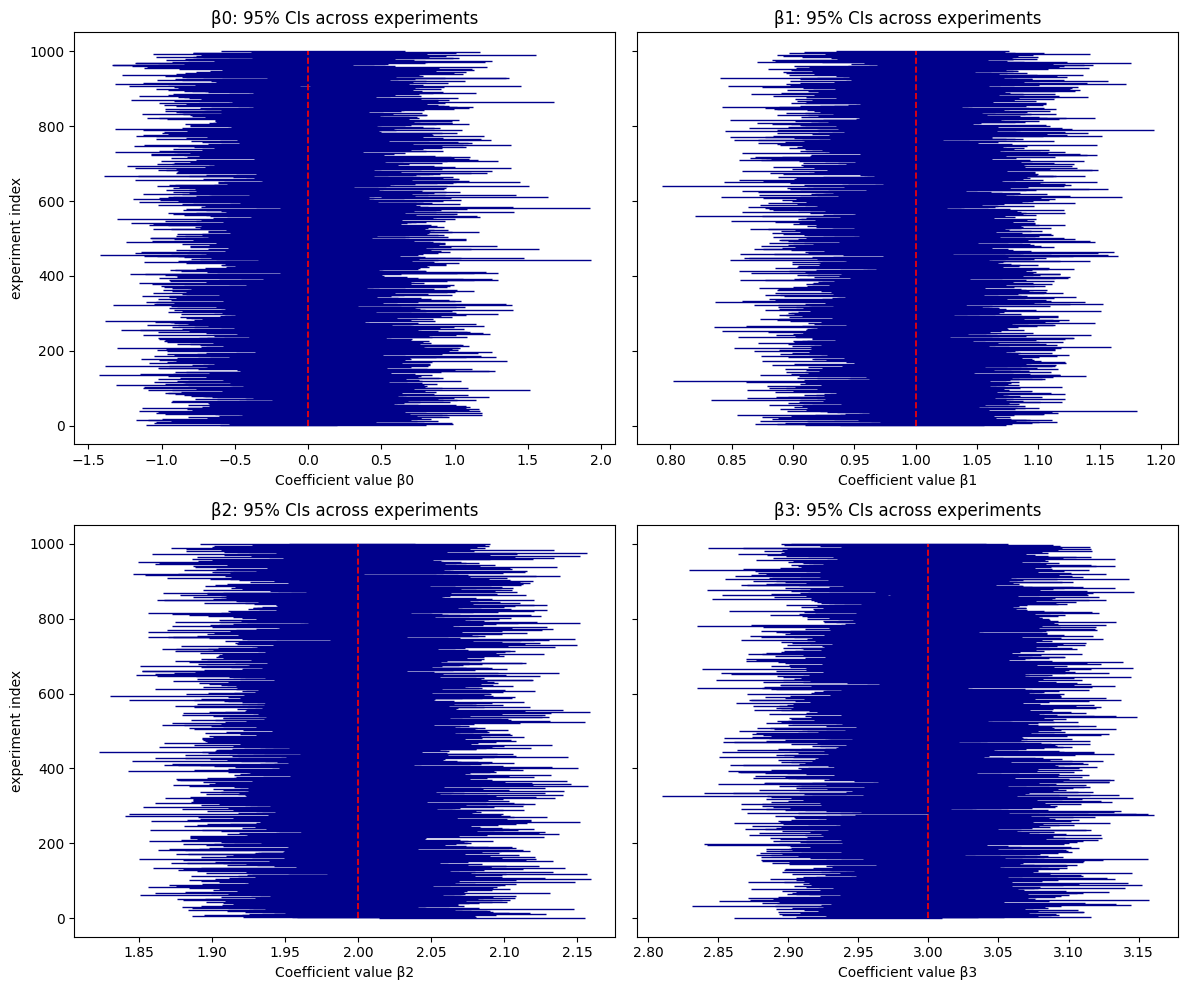

In [ ]:
# ---------------------------
# 5) CI's across experiments + coverage
# ---------------------------

# plot the 95% confidence intervals for each coefficient across 1000 experiments.
# each horizontal line represents one experiment’s CI
# the red dashed line marks the true β value.
vars = ['β0', 'β1', 'β2', 'β3']
true_map = {'β0': 0, 'β1': 1, 'β2': 2, 'β3': 3}

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]
    sub = cis_df[cis_df['coef'] == var].sort_values('experiment')
    y = sub['experiment'].to_numpy() + 1
    low = sub['low'].to_numpy()
    high = sub['high'].to_numpy()
    true_val = true_coefficients[true_map[var]]

    # add horizontal lines for CIs
    ax.hlines(y=y, xmin=low, xmax=high, color='darkblue', linewidth=1)

    # add vertical caps
    #cap_height = 0.15
    #ax.vlines(x=low, ymin=y - cap_height, ymax=y + cap_height, color='darkblue', linewidth=1)
    #ax.vlines(x=high, ymin=y - cap_height, ymax=y + cap_height, color='darkblue', linewidth=1)

    # add vertical red line for true coefficient
    ax.vlines(true_val, ymin=y.min()-1, ymax=y.max()+1,
              linestyles='--', colors='red', linewidth=1.2)

    ax.set_title(f"{var}: 95% CIs across experiments")
    ax.set_xlabel(f"Coefficient value {var}")
    if i % 2 == 0:
        ax.set_ylabel("experiment index")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

<mark style="background-color: #648fff;">Question:</mark> Now, make a guess: for the resulting confidence intervals, what precentage do you think contain the true coefficients $\beta_0, \ldots, \beta_3$. Will this percentage be the same for all coefficients? 

We constructed 95 % confidence intervals for each coefficient $\beta_j$. By definition, this means that if we were to repeat the sampling process many times, approximately 95 % of those intervals would contain the true coefficient value $\beta_j$.  

The observed percentage should differ slightly across $\beta_0, \ldots, \beta_3$ due to random variation in the simulated samples.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now, for each variable ($X_0, X_1, X_2, X_3$), compute how often the true coefficient falls inside the corresponding confidence interval (i.e., give a percentage).

In [79]:
# Define true β's and add to data frame
true_values = {'β0': 0, 'β1': 1, 'β2': 2, 'β3': 3}
cis_df['true_beta'] = cis_df['coef'].map(true_values)

# Check if the true coefficient value is contained by each CI
cis_df['covered'] = (cis_df['low'] <= cis_df['true_beta']) & (cis_df['true_beta'] <= cis_df['high'])

# Compute the percentage of times each coefficient’s CI contained the true β
coverage = cis_df.groupby('coef')['covered'].mean() * 100

coverage.round(1)

coef
β0    96.2
β1    94.9
β2    95.9
β3    95.8
Name: covered, dtype: float64

<br>
<mark style="background-color: #648fff;">Question:</mark> Was your prediction correct? If not, what do you think is happening?

Yes, it seems to be correct.

Now, we will do the same, but this time we will count how often the coefficients of all variables _simultaneously_ fall inside their confidence intervals.

<mark style="background-color: #648fff;">Question:</mark>  Will the resulting percentage be higher, lower or the same (make a guess)? Try to explain your reasoning.

In my opinion, the percentage should be **lower**, because all four coefficients must *simultaneously* fall within their confidence intervals — and according to the rules of probability, the joint probability of several independent events equals the product of their individual probabilities, which reduces the overall coverage.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now write the code to compute the simultaneous coverage percentage.

In [ ]:
# Compute the simultaneous coverage of all coefficients
cis_df = cis_df.copy()
cis_df['true_beta'] = cis_df['coef'].map(true_values)

# Check for each experiment whether the true coefficient value lies within its estimated 95% CI
cis_df['covered'] = (cis_df['low'] <= cis_df['true_beta']) & (cis_df['true_beta'] <= cis_df['high'])

# Determine for each experiment whether all coefficients were simultaneously covered 
covered_all_vars_per_run = cis_df.groupby('experiment')['covered'].all()

simultaneous_pct = covered_all_vars_per_run.mean() * 100
print(f"Simultaneous coverage (all coefficients covered): {simultaneous_pct:.1f}%")

Simultaneous coverage (all coefficients covered): 85.9%


<br>
<mark style="background-color: #648fff;">Question:</mark>  Were you right in your predicition? If not, what could be going wrong?

Yes, it seems to be correct.

## Understanding prediction intervals

We will now look at prediction intervals.

Given a DataFrame `new_covariates` containing observations of covariates (i.e., the predictors `X0, ..., X1`), you can compute the prediction intervals at level $alpha=0.05$ for each observation by calling:

In [81]:
# new_covariates = fresh_data[['X0','X1', 'X2', 'X3']] # As a placeholder for this example
# results.get_prediction(new_covariates).summary_frame(alpha=0.05)

The limits of the prediction interval are given by `obs_ci_lower` and `obs_ci_upper`.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Generate a fresh dataset by calling `generate_dataset`. Pick a random seed that has not been selected before and set `N=1000`. Then compute the prediction intervals for each observation following the example above.

In [ ]:
# Generate fresh data and prepare X vector
fresh_data = generate_dataset(N=1000, seed=15)
new_covariates = fresh_data[['X0','X1', 'X2', 'X3']]
fresh_data.head()

,X0,X1,X2,X3,Y
0,1.0,6.927434,2.875438,7.022343,32.889525
1,1.0,8.158171,7.887835,5.030247,40.243158
2,1.0,3.444068,2.501492,0.451447,9.511723
3,1.0,0.448382,0.747905,6.178247,20.377811
4,1.0,5.715973,6.565527,1.037294,24.027628


In [ ]:
# Fit OLS on the same data
res_fresh = sm.OLS(fresh_data['Y'], new_covariates).fit()

# Get the prediction intervals of Y (alpha=0.05; 95% intervals)
pred_intervals_df = res_fresh.get_prediction(new_covariates).summary_frame(alpha=0.05)
pred_intervals_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,33.780335,0.050303,33.681623,33.879046,31.811584,35.749085
1,39.009238,0.056265,38.898826,39.119649,37.039866,40.978609
2,9.788003,0.069613,9.651398,9.924609,7.816990,11.759017
3,20.521085,0.077784,20.368447,20.673724,18.548896,22.493275
4,21.921819,0.057141,21.809689,22.033949,19.952351,23.891288


<br>
<mark style="background-color: #648fff;">Question:</mark> Now, make a guess. What percentage of the measured outcomes ($Y$) will be contained inside their prediction interval?

It should be around $(1-\alpha) = 0.95$, since for a 95% prediction interval about 95% of the observed 𝑌 values are expected to fall within their intervals - the same as before with the coefficents $\beta_j$. 

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Compute the actual percentage and print it.

In [ ]:
# Compute percentage of Y inside their own prediction intervals
# Check if the observed Y value lies within each CI
pred_intervals_df['covered'] = (pred_intervals_df['obs_ci_lower'] <= fresh_data['Y']) & (fresh_data['Y'] <= pred_intervals_df['obs_ci_upper'])

# Compute the percentage of times each variable’s CI contained the observed Y
coverage = pred_intervals_df['covered'].mean() * 100

print(f"Approximately {coverage:.1f}%")


Approximately 96.1%


<br>
<mark style="background-color: #648fff;">Question:</mark> Was your hypothesis correct? If not, what is going wrong (make a guess).

The result is slightly higher than 95% (about 96.1%), but such small deviations are normal and can be explained by random sampling variability in finite samples.